<a href="https://colab.research.google.com/github/Seanghor/Machine-Learning/blob/main/Midterm%20Exam%20Semester3/Assignment_Mutilple_Linear_Regression_With_BitCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Go to yahoo finance 
2. Download the stock or crypto dataset based on your wish 
3. Duration of dataset : 1-Jan-2022 to 1-May-2022
4. Take the independent variable value from 2-May-2022
5. Give the input and predict the value
6. Compare the predicted result with actual value of 2-May-2022
7. You can find the efficiency 

In [51]:
#lib
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #Useful for visualization concept
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [32]:
#dataset
from google.colab import files 
upload =files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [33]:
dataset = pd.read_csv('BTC-USD.csv')
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [35]:
# Checking for missing value of dataset:
dataset.isnull
dataset.isnull().sum()/len(dataset)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [36]:
dataset = dataset.fillna(28814.85)

In [37]:
# Checking for missing value of dataset:
dataset.isnull
dataset.isnull().sum()/len(dataset)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [42]:
# Take the independent variable value from 2-May-2022
# Independent variable: Low, High
# Predict variable: Close


#select the variables
x_variable = ['Low','High', 'Volume' ] #input, Multiple input
y_variable = ['Close'] #output

len(x_variable)
#reshape variable
x = dataset[x_variable].values.reshape(-1,3) # 1st value is -1, next value is the length of x_variable
y = dataset[y_variable].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(121, 3)
(121, 1)


In [43]:
#split the dataset: 80% for train, 20% for testing
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2) # 80% for train, 20% for testing
print('Dataset Shape:', dataset.shape)
print('x_train:', x_train.shape)
print('x_test' ,x_test.shape)

Dataset Shape: (121, 7)
x_train: (96, 3)
x_test (25, 3)


In [44]:
#build a model(multipleLinear)
Multi_Linear_regression = LinearRegression()

In [57]:
#training 
model = Multi_Linear_regression.fit(x_train, y_train)

In [58]:
# From dataset in 02-May-2021 We have:
# Low = 38156.56, High=39,074.97, , Volume = 32,922,642,426, Close = 38529.33	
x_assum = np.array([38156.56, 39074.97, 32922642426]) 
x_assum = x_assum.reshape(1,-1)

y_predict = model.predict(x_assum)
print('Close(y_predict): ', y_predict)

Close(y_predict):  [[38600.59267956]]



*   Actual: 38529.33	
*   Predict: 38894.73405796

In [59]:
y_predicts = model.predict(x_test)
print('y_predicts.shape:', y_predicts.shape)
print(y_predicts)

y_predicts.shape: (25, 1)
[[39627.22608052]
 [38671.63047715]
 [42450.65921796]
 [47160.2458509 ]
 [36782.91120347]
 [44408.53922067]
 [35588.99474494]
 [41050.51301908]
 [36537.52549097]
 [40470.07982953]
 [38167.63676877]
 [39481.85500061]
 [40734.19551712]
 [41861.76628375]
 [42733.36955664]
 [39844.82350614]
 [42181.02552796]
 [43209.53200263]
 [42367.75359632]
 [37696.31995866]
 [46912.4255865 ]
 [35350.02867401]
 [42341.80718441]
 [38322.69916839]
 [39049.7503682 ]]


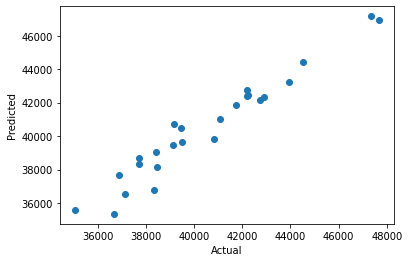

In [60]:
#graph
plt.scatter(y_test,y_predicts);
plt.xlabel('Actual');
plt.ylabel('Predicted');
